# The Sparks Foundation
# Data Science and Business Analytics Intern Task

## By Ghazali Akmal Rabbani
## Task 2

# Problem and Purpose

1. From the given 'Iris' dataset, predict the optimum number of clusters and represent it visually
2. User R or Python to perform this task
3. Dataset : https://bit.ly/3kXTdox

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df = pd.read_csv('Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


# Select all columns data except Id Column

In [5]:
df = df.iloc[:, 1:]
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


# Check Outliers for Each Feature Column

In [6]:
data_col_float = df.select_dtypes(include=['float64']).columns.tolist()
data_col_float

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

In [7]:
def boxplot_numerical(numerical):
    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical]).set_title(numerical)
    median = df[numerical].median()
    FirstQuartile = df[numerical].quantile(0.25)
    ThirdQuartile = df[numerical].quantile(0.75)
    Interquartile = scipy.stats.iqr(df[numerical])
    UpperFence = ThirdQuartile + (1.5*Interquartile)
    LowerFence = FirstQuartile - (1.5*Interquartile)

    print ('==================================')
    print ('Statistical Data Summary')
    print ('==================================')
    print ('Median : ', median)
    print ('1st Quartile : ', FirstQuartile)
    print ('3rd Quartile : ', ThirdQuartile)
    print ('IQR : ', Interquartile)
    print ('Upper Fence : ', UpperFence)
    print ('Lower Fence : ', LowerFence)
    print ('==================================')

    UpperOutliers = []
    LowerOutliers = []
    StatusUpperOutliers = False
    StatusLowerOutliers = False
    for x in df[numerical]:
      if (x > UpperFence):
        UpperOutliers.append(x)
        StatusUpperOutliers = True
      elif (x < LowerFence):
        LowerOutliers.append(x)
        StatusLowerOutliers = True
    print ()
    print ('==================================')
    print ('Outliers Data Detection')
    print ('==================================')
    print ('Upper Outliers Data : ', sorted(UpperOutliers, reverse=False))
    print ('Upper Outliers Status : ', StatusUpperOutliers)
    print ('Lower Outliers Data : ', sorted(LowerOutliers, reverse=False))
    print ('Lower Outliers Status : ', StatusLowerOutliers)

    plt.figure(figsize = (10, 6))
    sns.boxplot(df[numerical], showfliers = False).set_title(numerical + ' No Outliers')

## Sepal Length Outliers Checked

Statistical Data Summary
Median :  5.8
1st Quartile :  5.1
3rd Quartile :  6.4
IQR :  1.3000000000000007
Upper Fence :  8.350000000000001
Lower Fence :  3.1499999999999986

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


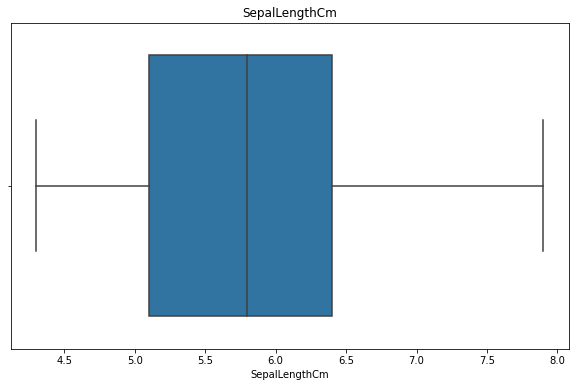

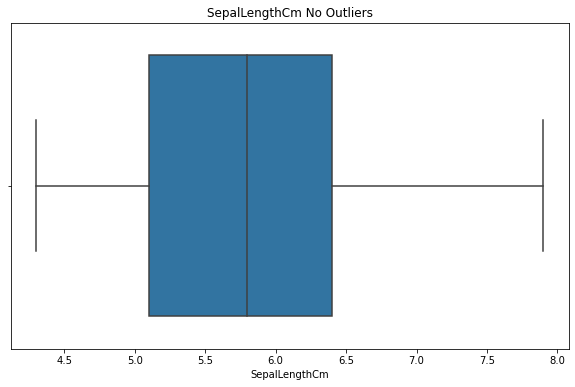

In [8]:
boxplot_numerical(data_col_float[0])

## Sepal Width Outliers Checked

Statistical Data Summary
Median :  3.0
1st Quartile :  2.8
3rd Quartile :  3.3
IQR :  0.5
Upper Fence :  4.05
Lower Fence :  2.05

Outliers Data Detection
Upper Outliers Data :  [4.1, 4.2, 4.4]
Upper Outliers Status :  True
Lower Outliers Data :  [2.0]
Lower Outliers Status :  True


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


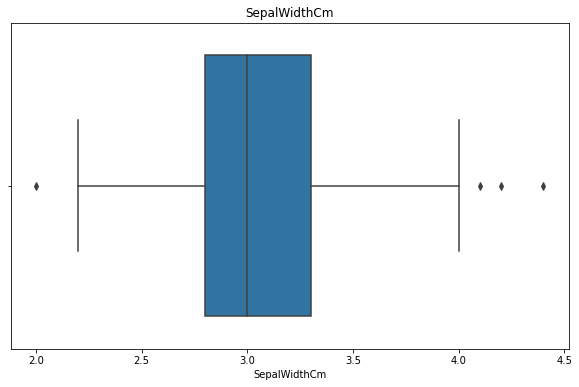

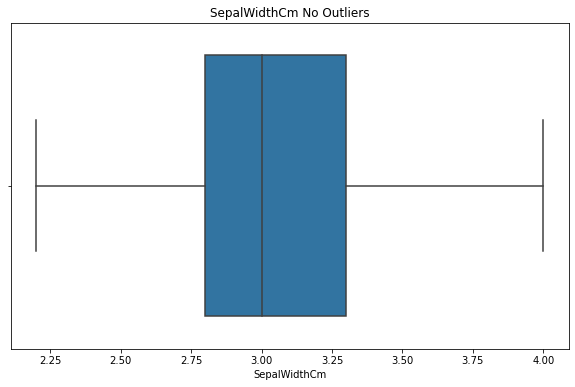

In [9]:
boxplot_numerical(data_col_float[1])

**There is 4 Outliers in Sepat Width Features. So it need to be removed later to enhance the learning of model**

## Petal Length Outliers Checked

Statistical Data Summary
Median :  4.35
1st Quartile :  1.6
3rd Quartile :  5.1
IQR :  3.4999999999999996
Upper Fence :  10.349999999999998
Lower Fence :  -3.649999999999999

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


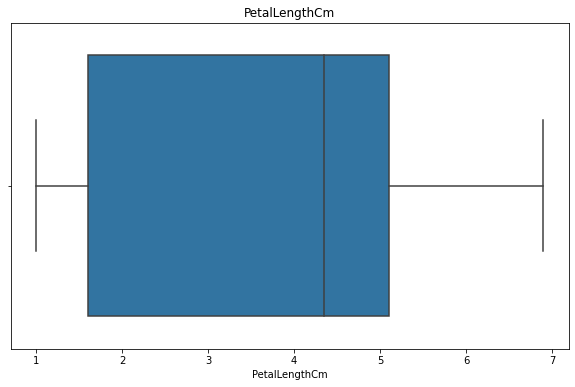

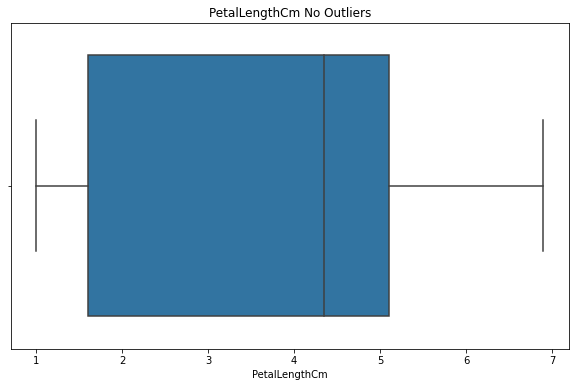

In [10]:
boxplot_numerical(data_col_float[2])

## Petal Width Outliers Checked

Statistical Data Summary
Median :  1.3
1st Quartile :  0.3
3rd Quartile :  1.8
IQR :  1.5
Upper Fence :  4.05
Lower Fence :  -1.95

Outliers Data Detection
Upper Outliers Data :  []
Upper Outliers Status :  False
Lower Outliers Data :  []
Lower Outliers Status :  False


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


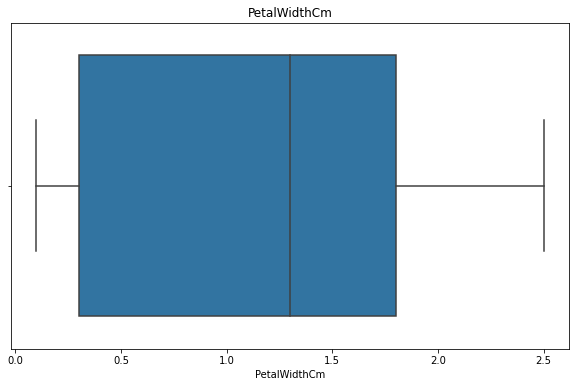

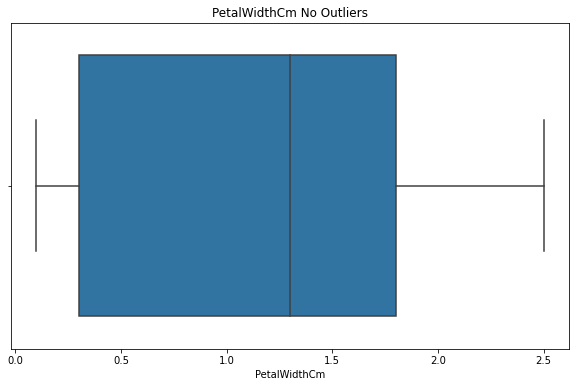

In [11]:
boxplot_numerical(data_col_float[3])

# Removing Outliers

## Get IQR for each column

Box plot use the IQR method to display data and outliers(shape of the data) but in order to be get a list of identified outlier, we will need to use the mathematical formula and retrieve the outlier data.

QR is somewhat similar to Z-score in terms of finding the distribution of data and then keeping some threshold to identify the outlier.

Let’s find out we can box plot uses IQR and how we can use it to find the list of outliers as we did using Z-score calculation. First we will calculate IQR,

In [12]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

SepalLengthCm    1.3
SepalWidthCm     0.5
PetalLengthCm    3.5
PetalWidthCm     1.5
dtype: float64


As we now have the IQR scores, it’s time to get hold on outliers. The below code will give an output with some true and false values. The data point where we have False that means these values are valid whereas True indicates presence of an outlier.

In [13]:
(df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))

<ipython-input-13-8665acf302a2>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
<ipython-input-13-8665acf302a2>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))


,PetalLengthCm,PetalWidthCm,SepalLengthCm,SepalWidthCm,Species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


## Remove Outliers

**Before Remove the Outliers**

In [14]:
df.shape

(150, 5)

In [15]:
df['Species'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

**After Remove the Outliers**

In [16]:
dfNoOutliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

<ipython-input-16-bf9f396b48f0>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfNoOutliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
<ipython-input-16-bf9f396b48f0>:1: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  dfNoOutliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [17]:
dfNoOutliers.shape

(146, 5)

In [18]:
dfNoOutliers['Species'].value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        47
Name: Species, dtype: int64

# Label Encoding the Labels

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

dfNoOutliers.Species = le.fit_transform(dfNoOutliers.Species)

C:\anaconda3\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [20]:
dfNoOutliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [21]:
dfNoOutliers['Species'].value_counts()

2    50
1    49
0    47
Name: Species, dtype: int64

1. Labels 2 is for **Iris-virginica**
2. Labels 1 is for **Iris-versicolor**
3. Labels 0 is for **Iris-setosa**

# Add SepalArea and PetalArea

I will use SepalArea and PetalArea as simplify feature of dataset to cluster it later

In [22]:
# Add SepalArea and PetalArea Column
dfNoOutliers['SepalArea'] = dfNoOutliers['SepalLengthCm']*dfNoOutliers['SepalWidthCm']
dfNoOutliers['PetalArea'] = dfNoOutliers['PetalLengthCm']*dfNoOutliers['PetalWidthCm']

#Re-arrange feature position in dataset
dfNoOutliers = dfNoOutliers[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','SepalArea','PetalArea','Species']]

<ipython-input-22-1e5e2b71aba6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNoOutliers['SepalArea'] = dfNoOutliers['SepalLengthCm']*dfNoOutliers['SepalWidthCm']
<ipython-input-22-1e5e2b71aba6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfNoOutliers['PetalArea'] = dfNoOutliers['PetalLengthCm']*dfNoOutliers['PetalWidthCm']


In [23]:
dfNoOutliers

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalArea,PetalArea,Species
0,5.1,3.5,1.4,0.2,17.85,0.28,0
1,4.9,3.0,1.4,0.2,14.70,0.28,0
2,4.7,3.2,1.3,0.2,15.04,0.26,0
3,4.6,3.1,1.5,0.2,14.26,0.30,0
4,5.0,3.6,1.4,0.2,18.00,0.28,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,11.96,2
146,6.3,2.5,5.0,1.9,15.75,9.50,2
147,6.5,3.0,5.2,2.0,19.50,10.40,2
148,6.2,3.4,5.4,2.3,21.08,12.42,2


# Clustering the Dataset based on SepalArea and PetalArea

In [24]:
dfAreas = dfNoOutliers.iloc[:, 4:-1]
dfAreas

,SepalArea,PetalArea
0,17.85,0.28
1,14.70,0.28
2,15.04,0.26
3,14.26,0.30
4,18.00,0.28
...,...,...
145,20.10,11.96
146,15.75,9.50
147,19.50,10.40
148,21.08,12.42


## Use Elbow Method to Find the Optimum Cluster for Dataset

<AxesSubplot:>

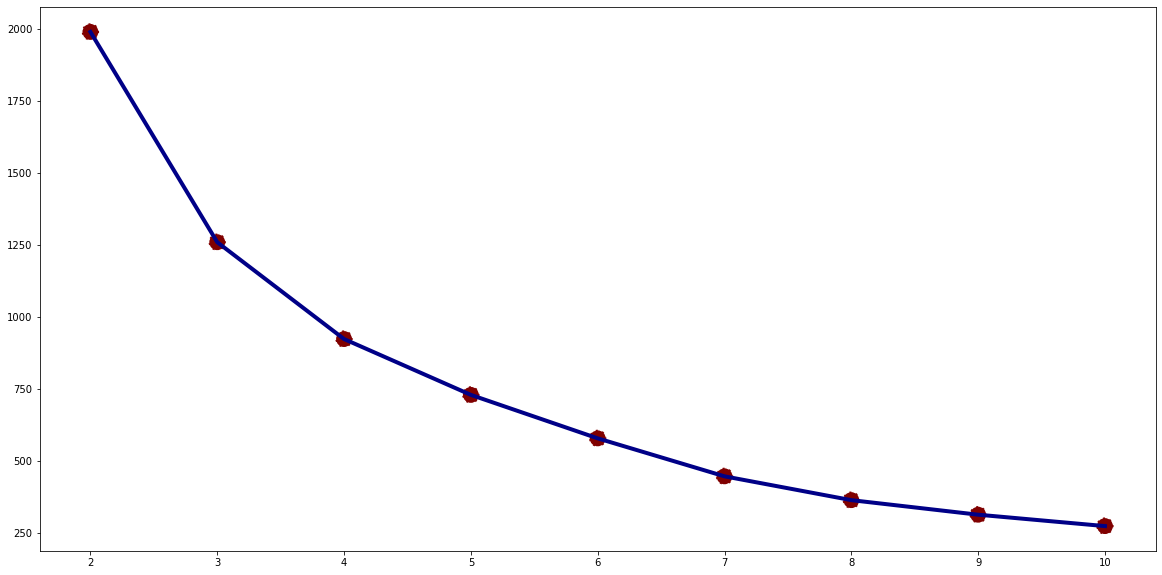

In [25]:
from sklearn.cluster import KMeans

inertia = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=10)
    kmeans.fit(dfAreas.values)
    inertia.append(kmeans.inertia_)
    
plt.figure(figsize=(20,10))
sns.lineplot(x=range(2,11), y=inertia, color='#000087', linewidth=4)
sns.scatterplot(x=range(2,11), y=inertia, s=300, color='#800000', linestyle='--')

**From Elbow Method Plot in above, the best n_clusters is 4**

## Train the Model and Get the Labels

In [26]:
kmeans_area = KMeans(n_clusters=4, random_state=10)
kmeans_area.fit(dfAreas)

KMeans(n_clusters=4, random_state=10)

In [27]:
dfAreas['Cluster'] = kmeans_area.labels_
dfAreas

,SepalArea,PetalArea,Cluster
0,17.85,0.28,1
1,14.70,0.28,1
2,15.04,0.26,1
3,14.26,0.30,1
4,18.00,0.28,1
...,...,...,...
145,20.10,11.96,0
146,15.75,9.50,2
147,19.50,10.40,2
148,21.08,12.42,0


## Visualization of Clustering dfAreas

<AxesSubplot:xlabel='SepalArea', ylabel='PetalArea'>

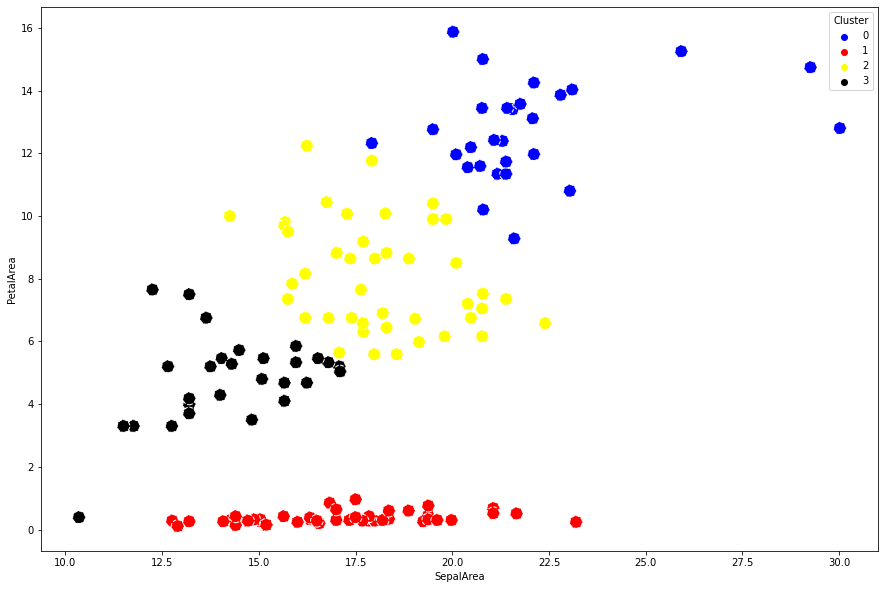

In [28]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='SepalArea', y='PetalArea',
    hue='Cluster',
    linestyle='--',
    data=dfAreas,
    palette=['blue','red','yellow','black'],
    s=160,
    ax=ax
)

## Evaluation with Silhoutte Score

In [61]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfAreas)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(dfAreas, preds)
    print('For n_clusters = {}, silhouette score is {}'. format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.474608879733154
For n_clusters = 3, silhouette score is 0.4215183927002268
For n_clusters = 4, silhouette score is 0.44731777286791147
For n_clusters = 5, silhouette score is 0.47336821318712663
For n_clusters = 6, silhouette score is 0.5338827040792211
For n_clusters = 7, silhouette score is 0.5489067227780894
For n_clusters = 8, silhouette score is 0.5315247559305298
For n_clusters = 9, silhouette score is 0.503249923904263
For n_clusters = 10, silhouette score is 0.47605743121062355


Based on silhouette score in above, the best clusters **is 7 with 0.54**. So we need to re-cluster the dataset with 7 Clusters

In [30]:
kmeans_area_best = KMeans(n_clusters=7, random_state=10)
kmeans_area_best.fit(dfAreas)

KMeans(n_clusters=7, random_state=10)

In [31]:
dfAreas['Cluster'] = kmeans_area_best.labels_
dfAreas

,SepalArea,PetalArea,Cluster
0,17.85,0.28,3
1,14.70,0.28,0
2,15.04,0.26,0
3,14.26,0.30,0
4,18.00,0.28,3
...,...,...,...
145,20.10,11.96,4
146,15.75,9.50,5
147,19.50,10.40,5
148,21.08,12.42,4


<AxesSubplot:xlabel='SepalArea', ylabel='PetalArea'>

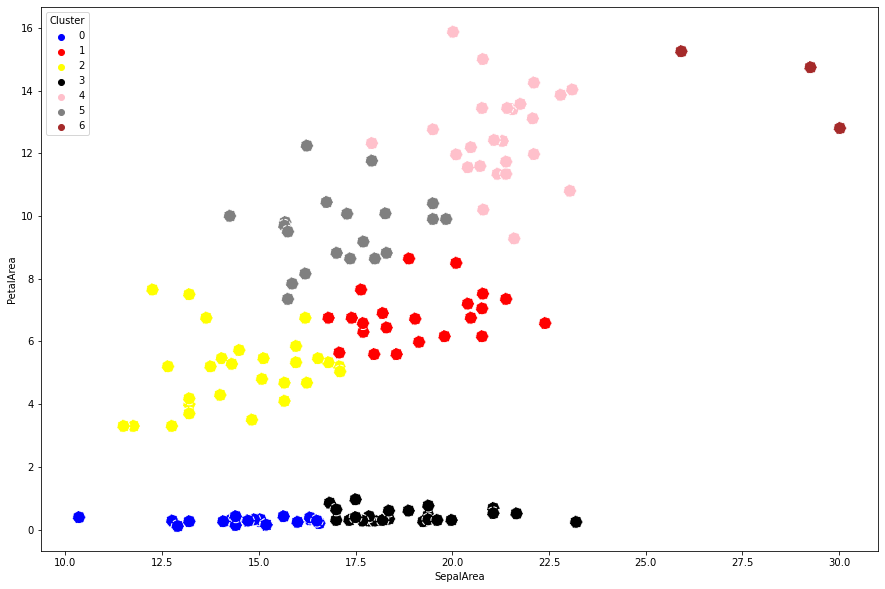

In [32]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x='SepalArea', y='PetalArea',
    hue='Cluster',
    linestyle='--',
    data=dfAreas,
    palette=['blue','red','yellow','black','pink','gray','brown'],
    s=160,
    ax=ax
)

# Clustering the Dataset based on Sepal Features (SepalLength & SepalWidth)

In [33]:
dfSepalFeatures = dfNoOutliers.iloc[:, 0:2]
dfSepalFeatures

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


## Use Elbow Method to Find the best Cluster for dfSepalFeatures

<AxesSubplot:>

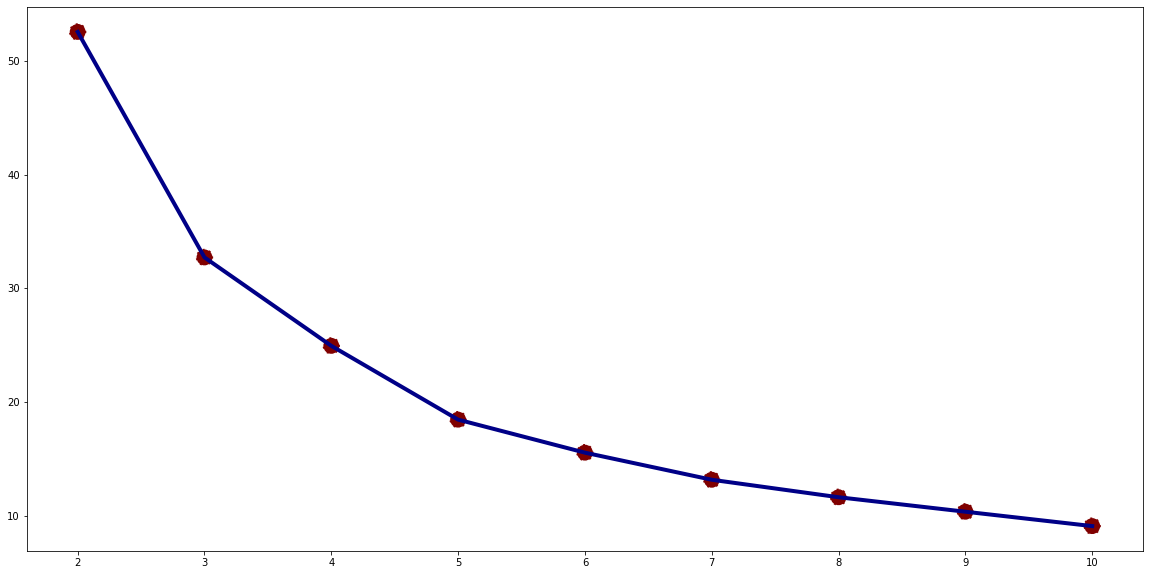

In [34]:
from sklearn.cluster import KMeans

inertia_dfSepalFeatures = []

for i in range(2,11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfSepalFeatures.values)
    inertia_dfSepalFeatures.append(kmeans.inertia_)

plt.figure(figsize=(20,10))
sns.lineplot(x=range(2, 11), y=inertia_dfSepalFeatures, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia_dfSepalFeatures, s=300, color='#800000',  linestyle='--')

Based on Elbow Method plot in above, **the best clusters is 5**

## Train the Model and Get the Label

In [35]:
kmeans_sepal = KMeans(n_clusters=5, random_state=10)
kmeans_sepal.fit(dfSepalFeatures)

KMeans(n_clusters=5, random_state=10)

In [36]:
dfSepalFeatures['Cluster'] = kmeans_sepal.labels_
dfSepalFeatures

,SepalLengthCm,SepalWidthCm,Cluster
0,5.1,3.5,1
1,4.9,3.0,4
2,4.7,3.2,4
3,4.6,3.1,4
4,5.0,3.6,1
...,...,...,...
145,6.7,3.0,3
146,6.3,2.5,0
147,6.5,3.0,3
148,6.2,3.4,3


## Visualization of Cluster dfSepalFeatures

<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>

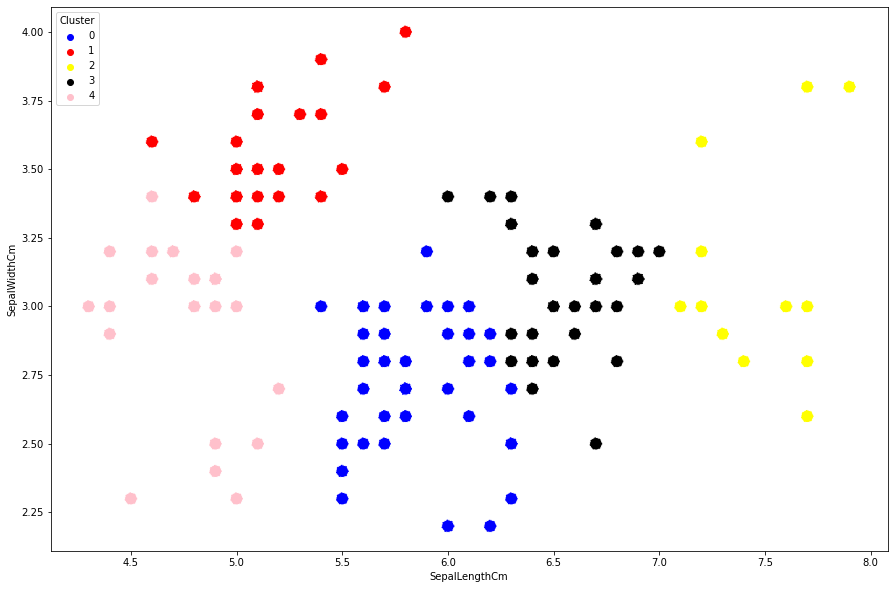

In [37]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="SepalLengthCm", y="SepalWidthCm",
    hue="Cluster",
    linestyle='--',
    data=dfSepalFeatures,
    palette=['blue','red','yellow','black','pink'],
    s=160,
    ax=ax
)

## Evaluation with Silhouette Score

In [38]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2,11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfSepalFeatures)
    centers = clusterer.cluster_centers_
    
    score = silhouette_score(dfSepalFeatures, preds)
    print('For n_clusters = {}, silhouette score is {}'. format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6021298478974088
For n_clusters = 3, silhouette score is 0.6725750853024997
For n_clusters = 4, silhouette score is 0.7043416140944285
For n_clusters = 5, silhouette score is 0.7154333104857368
For n_clusters = 6, silhouette score is 0.6152613792346177
For n_clusters = 7, silhouette score is 0.6762003958731627
For n_clusters = 8, silhouette score is 0.5297610567919256
For n_clusters = 9, silhouette score is 0.46328862621932093
For n_clusters = 10, silhouette score is 0.45060676949659173


Based on Silhouette Score in above, **the best clusters is 5 with 0.71**. So, we don't need to re-cluster the data again

# Clustering the dataset based on Petal Features (PetalLength & PetalWidth)

In [39]:
dfPetalFeatures = dfNoOutliers.iloc[:, 2:4]
dfPetalFeatures

,PetalLengthCm,PetalWidthCm
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


## Use Elbow Method to Find the best Clusters for dfPetalFeatures

<AxesSubplot:>

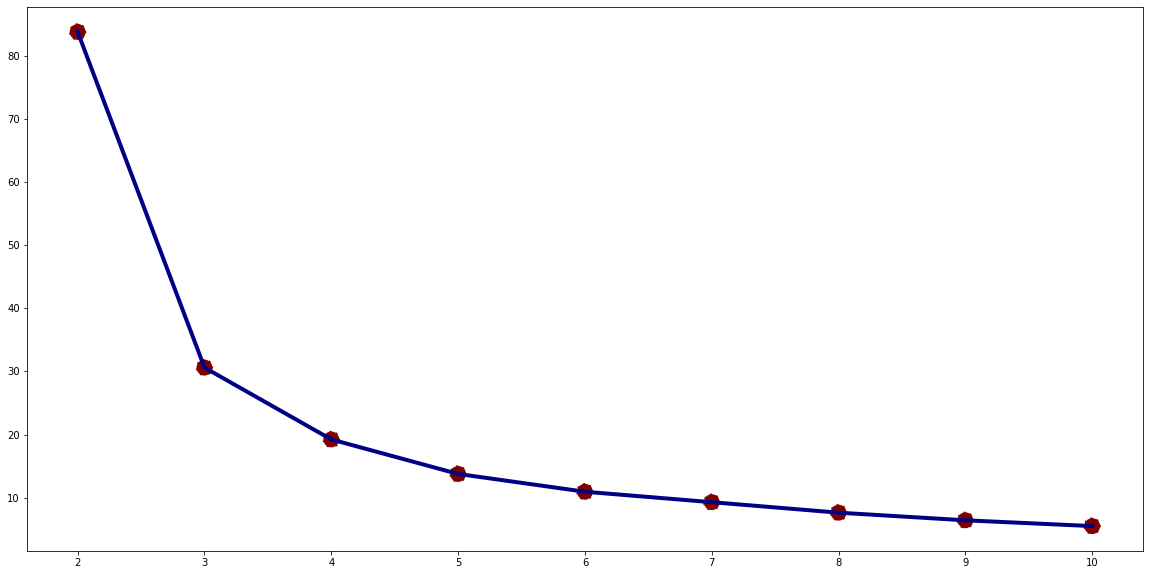

In [40]:
from sklearn.cluster import KMeans
inertia_petalFeatures = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfPetalFeatures.values)
    inertia_petalFeatures.append(kmeans.inertia_)



plt.figure(figsize=(20, 10))

sns.lineplot(x=range(2, 11), y=inertia_petalFeatures, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia_petalFeatures, s=300, color='#800000',  linestyle='--')

Based on Elbow Method plot in above, **the best clusters is 4**

## Train the Model and Get the Label

In [41]:
kmeans_petalFeatures = KMeans(n_clusters=4, random_state=10)
kmeans_petalFeatures.fit(dfPetalFeatures)

KMeans(n_clusters=4, random_state=10)

In [42]:
dfPetalFeatures['Cluster'] = kmeans_petalFeatures.labels_
dfPetalFeatures

,PetalLengthCm,PetalWidthCm,Cluster
0,1.4,0.2,0
1,1.4,0.2,0
2,1.3,0.2,0
3,1.5,0.2,0
4,1.4,0.2,0
...,...,...,...
145,5.2,2.3,1
146,5.0,1.9,3
147,5.2,2.0,3
148,5.4,2.3,1


## Visualization of Clusters dfPetalFeatures

<AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalWidthCm'>

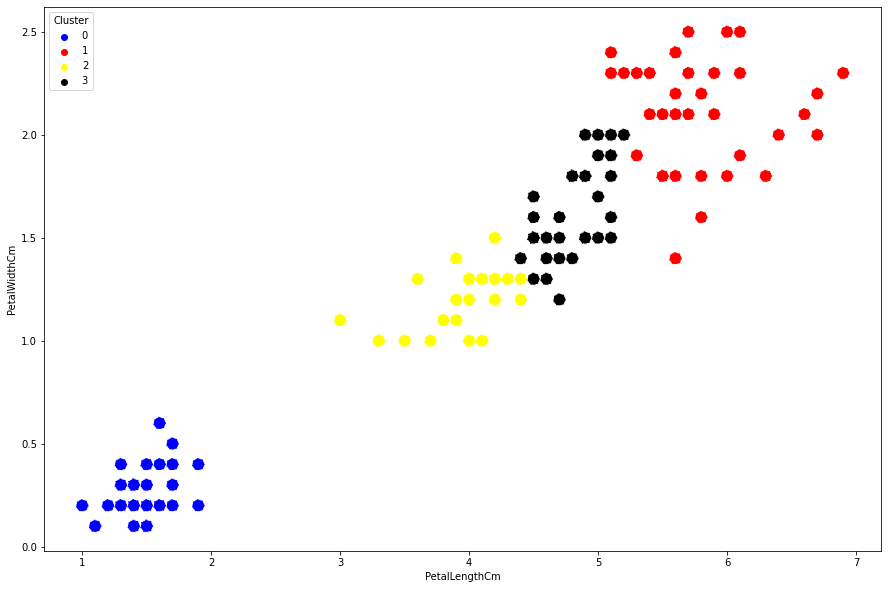

In [43]:
fig, ax = plt.subplots(figsize=(15,10))

sns.scatterplot(
    x="PetalLengthCm", y="PetalWidthCm",
    hue="Cluster",
    linestyle='--',
    data=dfPetalFeatures,
    palette=['blue','red','yellow','black'],
    s=160,
    ax=ax
)

## Evaluation with Silhouette Score

In [44]:
from sklearn.metrics import silhouette_score

for n_clusters in range (2, 11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfPetalFeatures)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dfPetalFeatures, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.7357650691977385)
For n_clusters = 3, silhouette score is 0.742302643241177)
For n_clusters = 4, silhouette score is 0.7755470355759764)
For n_clusters = 5, silhouette score is 0.7090661650958163)
For n_clusters = 6, silhouette score is 0.6585882298826434)
For n_clusters = 7, silhouette score is 0.6437306643176217)
For n_clusters = 8, silhouette score is 0.6268462412036192)
For n_clusters = 9, silhouette score is 0.635293213145894)
For n_clusters = 10, silhouette score is 0.49051786882475135)


Based on Silhouette Score in above, **the best clusters is 4 with 0.77**. So we don't need to re-cluster the dataset

# Clustering the Dataset based on High Colinearity

## Check Colinearity

<AxesSubplot:>

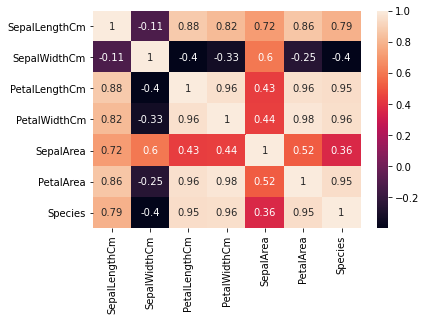

In [45]:
import seaborn as sns

sns.heatmap(dfNoOutliers.corr(), annot=True)

Based on heatmap correlation in above, features which has high colinearity with labels is **PetalLengthCm, PetalWidthCm, and PetalArea** . So the rest features will be dropped

## Drop the Column which has low colinearity

In [46]:
dfHighColinearity = dfNoOutliers.copy()
dfHighColinearity

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalArea,PetalArea,Species
0,5.1,3.5,1.4,0.2,17.85,0.28,0
1,4.9,3.0,1.4,0.2,14.70,0.28,0
2,4.7,3.2,1.3,0.2,15.04,0.26,0
3,4.6,3.1,1.5,0.2,14.26,0.30,0
4,5.0,3.6,1.4,0.2,18.00,0.28,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,11.96,2
146,6.3,2.5,5.0,1.9,15.75,9.50,2
147,6.5,3.0,5.2,2.0,19.50,10.40,2
148,6.2,3.4,5.4,2.3,21.08,12.42,2


In [47]:
dfHighColinearity = dfHighColinearity.drop(['SepalLengthCm','SepalWidthCm', 'SepalArea','Species'], axis=1)
dfHighColinearity

,PetalLengthCm,PetalWidthCm,PetalArea
0,1.4,0.2,0.28
1,1.4,0.2,0.28
2,1.3,0.2,0.26
3,1.5,0.2,0.30
4,1.4,0.2,0.28
...,...,...,...
145,5.2,2.3,11.96
146,5.0,1.9,9.50
147,5.2,2.0,10.40
148,5.4,2.3,12.42


## Use Elbow Method to Find Best Clusters

<AxesSubplot:>

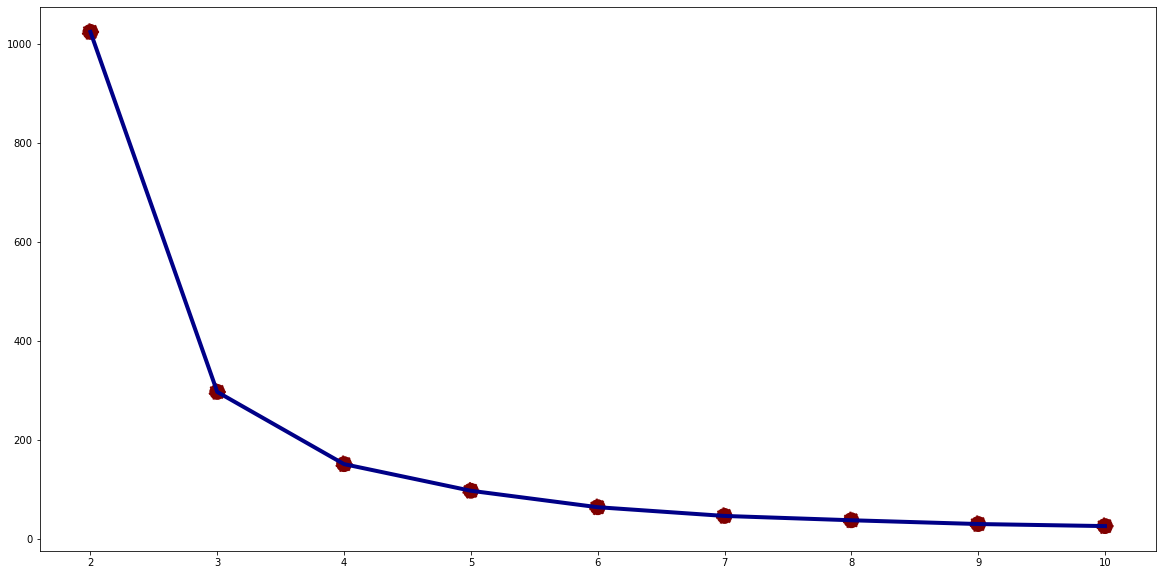

In [48]:
from sklearn.cluster import KMeans
inertia_highColinearity = []

for i in range(2, 11):
    kmeans_highColinearity = KMeans(n_clusters=i, random_state=0)
    kmeans_highColinearity.fit(dfHighColinearity.values)
    inertia_highColinearity.append(kmeans_highColinearity.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia_highColinearity, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia_highColinearity, s=300, color='#800000',  linestyle='--')

Based on Elbow Method in above, **the best clusters is 4**

## Train the Model and Get the Label

In [49]:
kmeans_highColinearity = KMeans(n_clusters=4, random_state=10)
kmeans_highColinearity.fit(dfHighColinearity)

KMeans(n_clusters=4, random_state=10)

In [50]:
dfHighColinearity['Cluster'] = kmeans_highColinearity.labels_
dfHighColinearity

,PetalLengthCm,PetalWidthCm,PetalArea,Cluster
0,1.4,0.2,0.28,0
1,1.4,0.2,0.28,0
2,1.3,0.2,0.26,0
3,1.5,0.2,0.30,0
4,1.4,0.2,0.28,0
...,...,...,...,...
145,5.2,2.3,11.96,3
146,5.0,1.9,9.50,1
147,5.2,2.0,10.40,1
148,5.4,2.3,12.42,3


## 3D Visualization of Clustering dfHighColinearity

I use 3D visualization because I have 3 Features in dfHighColinearity

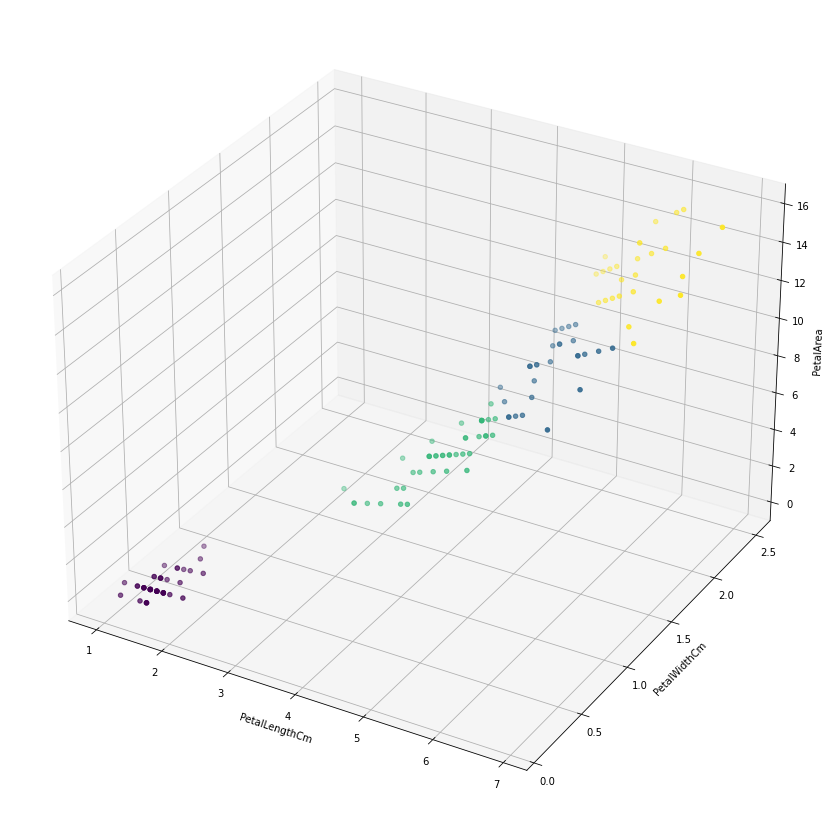

In [51]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

x =dfHighColinearity['PetalLengthCm']
y =dfHighColinearity['PetalWidthCm']
z =dfHighColinearity['PetalArea']



ax.scatter(x, y, z, c=dfHighColinearity['Cluster'], marker='o')

ax.set_xlabel('PetalLengthCm')
ax.set_ylabel('PetalWidthCm')
ax.set_zlabel('PetalArea')

plt.show()

## Evaluation with Silhouette Score

In [52]:
from sklearn.metrics import silhouette_score

for n_clusters in range (2, 11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfHighColinearity)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dfHighColinearity, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6276665794036983)
For n_clusters = 3, silhouette score is 0.6924913370912686)
For n_clusters = 4, silhouette score is 0.7095547656218174)
For n_clusters = 5, silhouette score is 0.6764356621546522)
For n_clusters = 6, silhouette score is 0.6607586191871568)
For n_clusters = 7, silhouette score is 0.6559876830934092)
For n_clusters = 8, silhouette score is 0.6727233523835617)
For n_clusters = 9, silhouette score is 0.6646298724917273)
For n_clusters = 10, silhouette score is 0.6673612953620317)


Based on Silhouette Score in above, **the best clusters is 4 with 0.70**. So we don't need to re-cluster the dataset

# Clustering the Dataset based on Low Colinearity

## Recall the Colinearity

<AxesSubplot:>

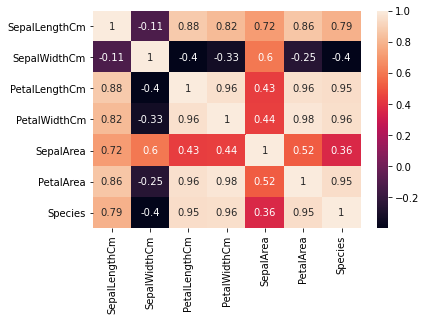

In [53]:
import seaborn as sns

sns.heatmap(dfNoOutliers.corr(), annot=True)

Based on heatmap correlation in above, features which has low colinearity with labels is **SepalLengthCm, SepalWidthCm, and SepalArea** . So the rest features will be dropped

## Drop the Column which has high colinearity

In [54]:
dfLowColinearity = dfNoOutliers.copy()
dfLowColinearity

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,SepalArea,PetalArea,Species
0,5.1,3.5,1.4,0.2,17.85,0.28,0
1,4.9,3.0,1.4,0.2,14.70,0.28,0
2,4.7,3.2,1.3,0.2,15.04,0.26,0
3,4.6,3.1,1.5,0.2,14.26,0.30,0
4,5.0,3.6,1.4,0.2,18.00,0.28,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,20.10,11.96,2
146,6.3,2.5,5.0,1.9,15.75,9.50,2
147,6.5,3.0,5.2,2.0,19.50,10.40,2
148,6.2,3.4,5.4,2.3,21.08,12.42,2


In [55]:
dfLowColinearity = dfLowColinearity.drop(['PetalLengthCm','PetalWidthCm', 'PetalArea','Species'], axis=1)
dfLowColinearity

,SepalLengthCm,SepalWidthCm,SepalArea
0,5.1,3.5,17.85
1,4.9,3.0,14.70
2,4.7,3.2,15.04
3,4.6,3.1,14.26
4,5.0,3.6,18.00
...,...,...,...
145,6.7,3.0,20.10
146,6.3,2.5,15.75
147,6.5,3.0,19.50
148,6.2,3.4,21.08


## Use Elbow Method to Find Best Clusters

<AxesSubplot:>

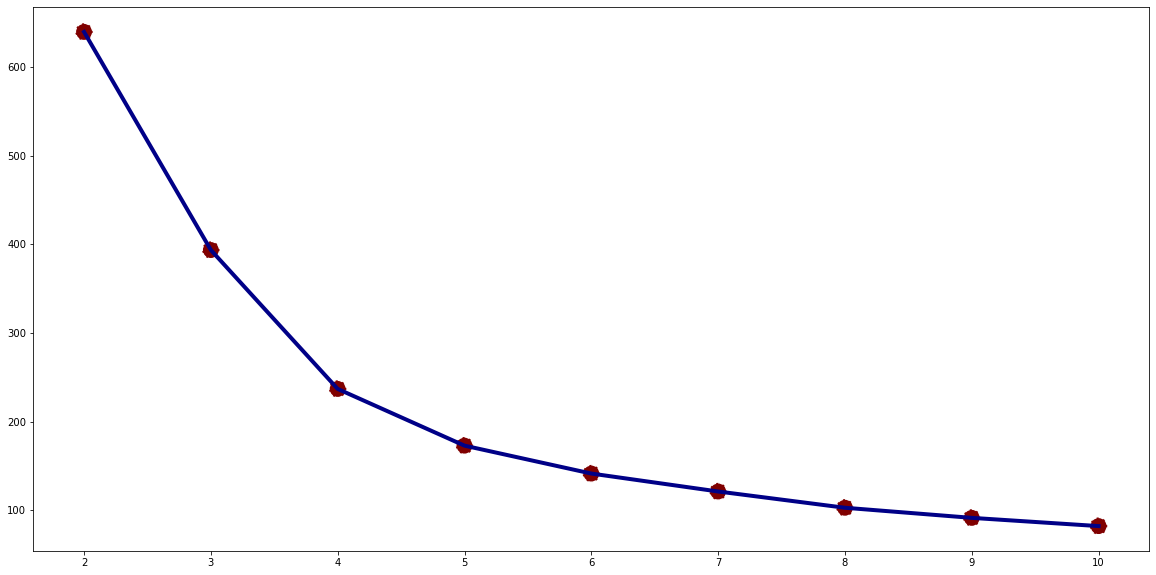

In [56]:
from sklearn.cluster import KMeans
inertia_lowColinearity = []

for i in range(2, 11):
    kmeans_lowColinearity = KMeans(n_clusters=i, random_state=0)
    kmeans_lowColinearity.fit(dfLowColinearity.values)
    inertia_lowColinearity.append(kmeans_lowColinearity.inertia_)



plt.figure(figsize=(20, 10))
# plt.plot(inertia)

sns.lineplot(x=range(2, 11), y=inertia_lowColinearity, color='#000087', linewidth = 4)
sns.scatterplot(x=range(2, 11), y=inertia_lowColinearity, s=300, color='#800000',  linestyle='--')

Based on Elbow Method in above, **The best clusters is 4**

## Train the Model and Get the Label

In [57]:
kmeans_lowColinearity = KMeans(n_clusters=4, random_state=10)
kmeans_lowColinearity.fit(dfLowColinearity)

KMeans(n_clusters=4, random_state=10)

In [58]:
dfLowColinearity['Cluster'] = kmeans_lowColinearity.labels_
dfLowColinearity

,SepalLengthCm,SepalWidthCm,SepalArea,Cluster
0,5.1,3.5,17.85,0
1,4.9,3.0,14.70,3
2,4.7,3.2,15.04,3
3,4.6,3.1,14.26,3
4,5.0,3.6,18.00,0
...,...,...,...,...
145,6.7,3.0,20.10,1
146,6.3,2.5,15.75,0
147,6.5,3.0,19.50,1
148,6.2,3.4,21.08,1


## 3D Visualization of Cluster dfLowColinearity

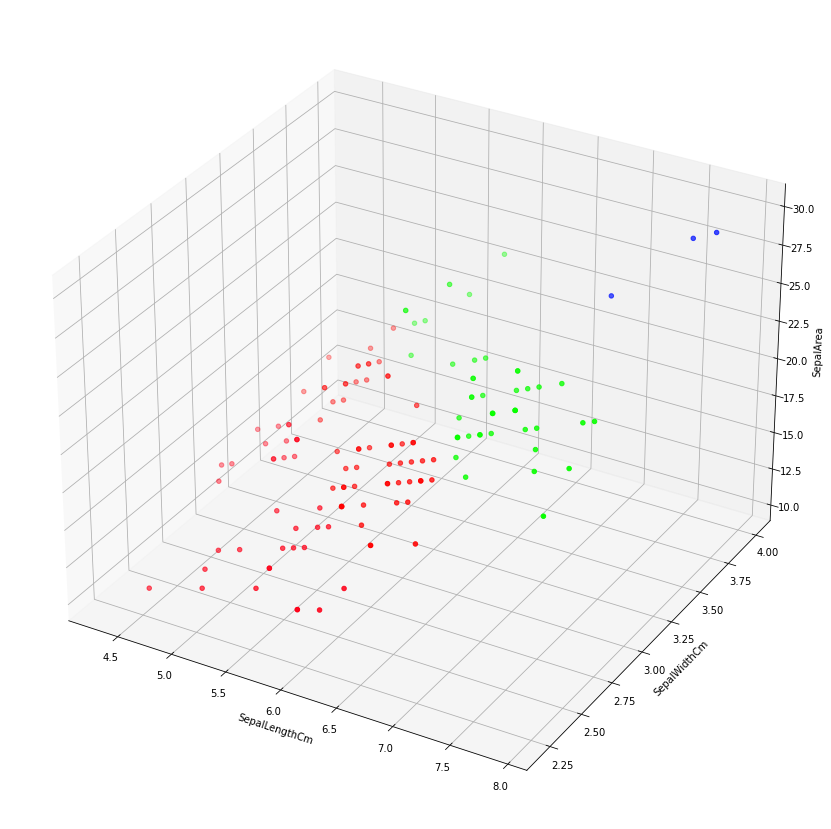

In [59]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt



fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111, projection='3d')

x =dfLowColinearity['SepalLengthCm']
y =dfLowColinearity['SepalWidthCm']
z =dfLowColinearity['SepalArea']



ax.scatter(x, y, z, c=dfLowColinearity['Cluster'], marker='o',cmap='hsv')

ax.set_xlabel('SepalLengthCm')
ax.set_ylabel('SepalWidthCm')
ax.set_zlabel('SepalArea')

plt.show()

## Evaluation with Silhouette Score

In [60]:
from sklearn.metrics import silhouette_score

for n_clusters in range (2, 11):
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(dfLowColinearity)
    centers = clusterer.cluster_centers_

    score = silhouette_score(dfLowColinearity, preds)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.49187535866223103)
For n_clusters = 3, silhouette score is 0.5634824058518085)
For n_clusters = 4, silhouette score is 0.5948614258263293)
For n_clusters = 5, silhouette score is 0.47916583117553496)
For n_clusters = 6, silhouette score is 0.4524979646470218)
For n_clusters = 7, silhouette score is 0.43045762506477775)
For n_clusters = 8, silhouette score is 0.43170984715062904)
For n_clusters = 9, silhouette score is 0.449051672030418)
For n_clusters = 10, silhouette score is 0.42465146101846885)


Based on Silhouette Score in above, **the best clusters is 4 with 0.59**. So we don't need to re-cluster the dataset